# PHYS434 - Lab 2: Probability, Distributions, and Statistical Questions

### Thomas K. Waters

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.integrate import simps
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import norm
from scipy.special import gammaln # x! = Gamma(x+1)
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (15,10) #Setting future plot sizes

## Problem 1
In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

In [3]:
X = 5
Y = 8

### A) 
Show how the probability distribution of the background changes as you integrate (sum) for more days.

In [4]:
x = np.arange(0,50, 1)

In [5]:
background = stats.poisson.pmf(x, mu = X, loc = 0)

In [6]:
Day1 = background
Day2 = np.convolve(background, background)
Day3 = np.convolve(Day2, background)
Day4 = np.convolve(Day3, background)
Day5 = np.convolve(Day4, background)

''

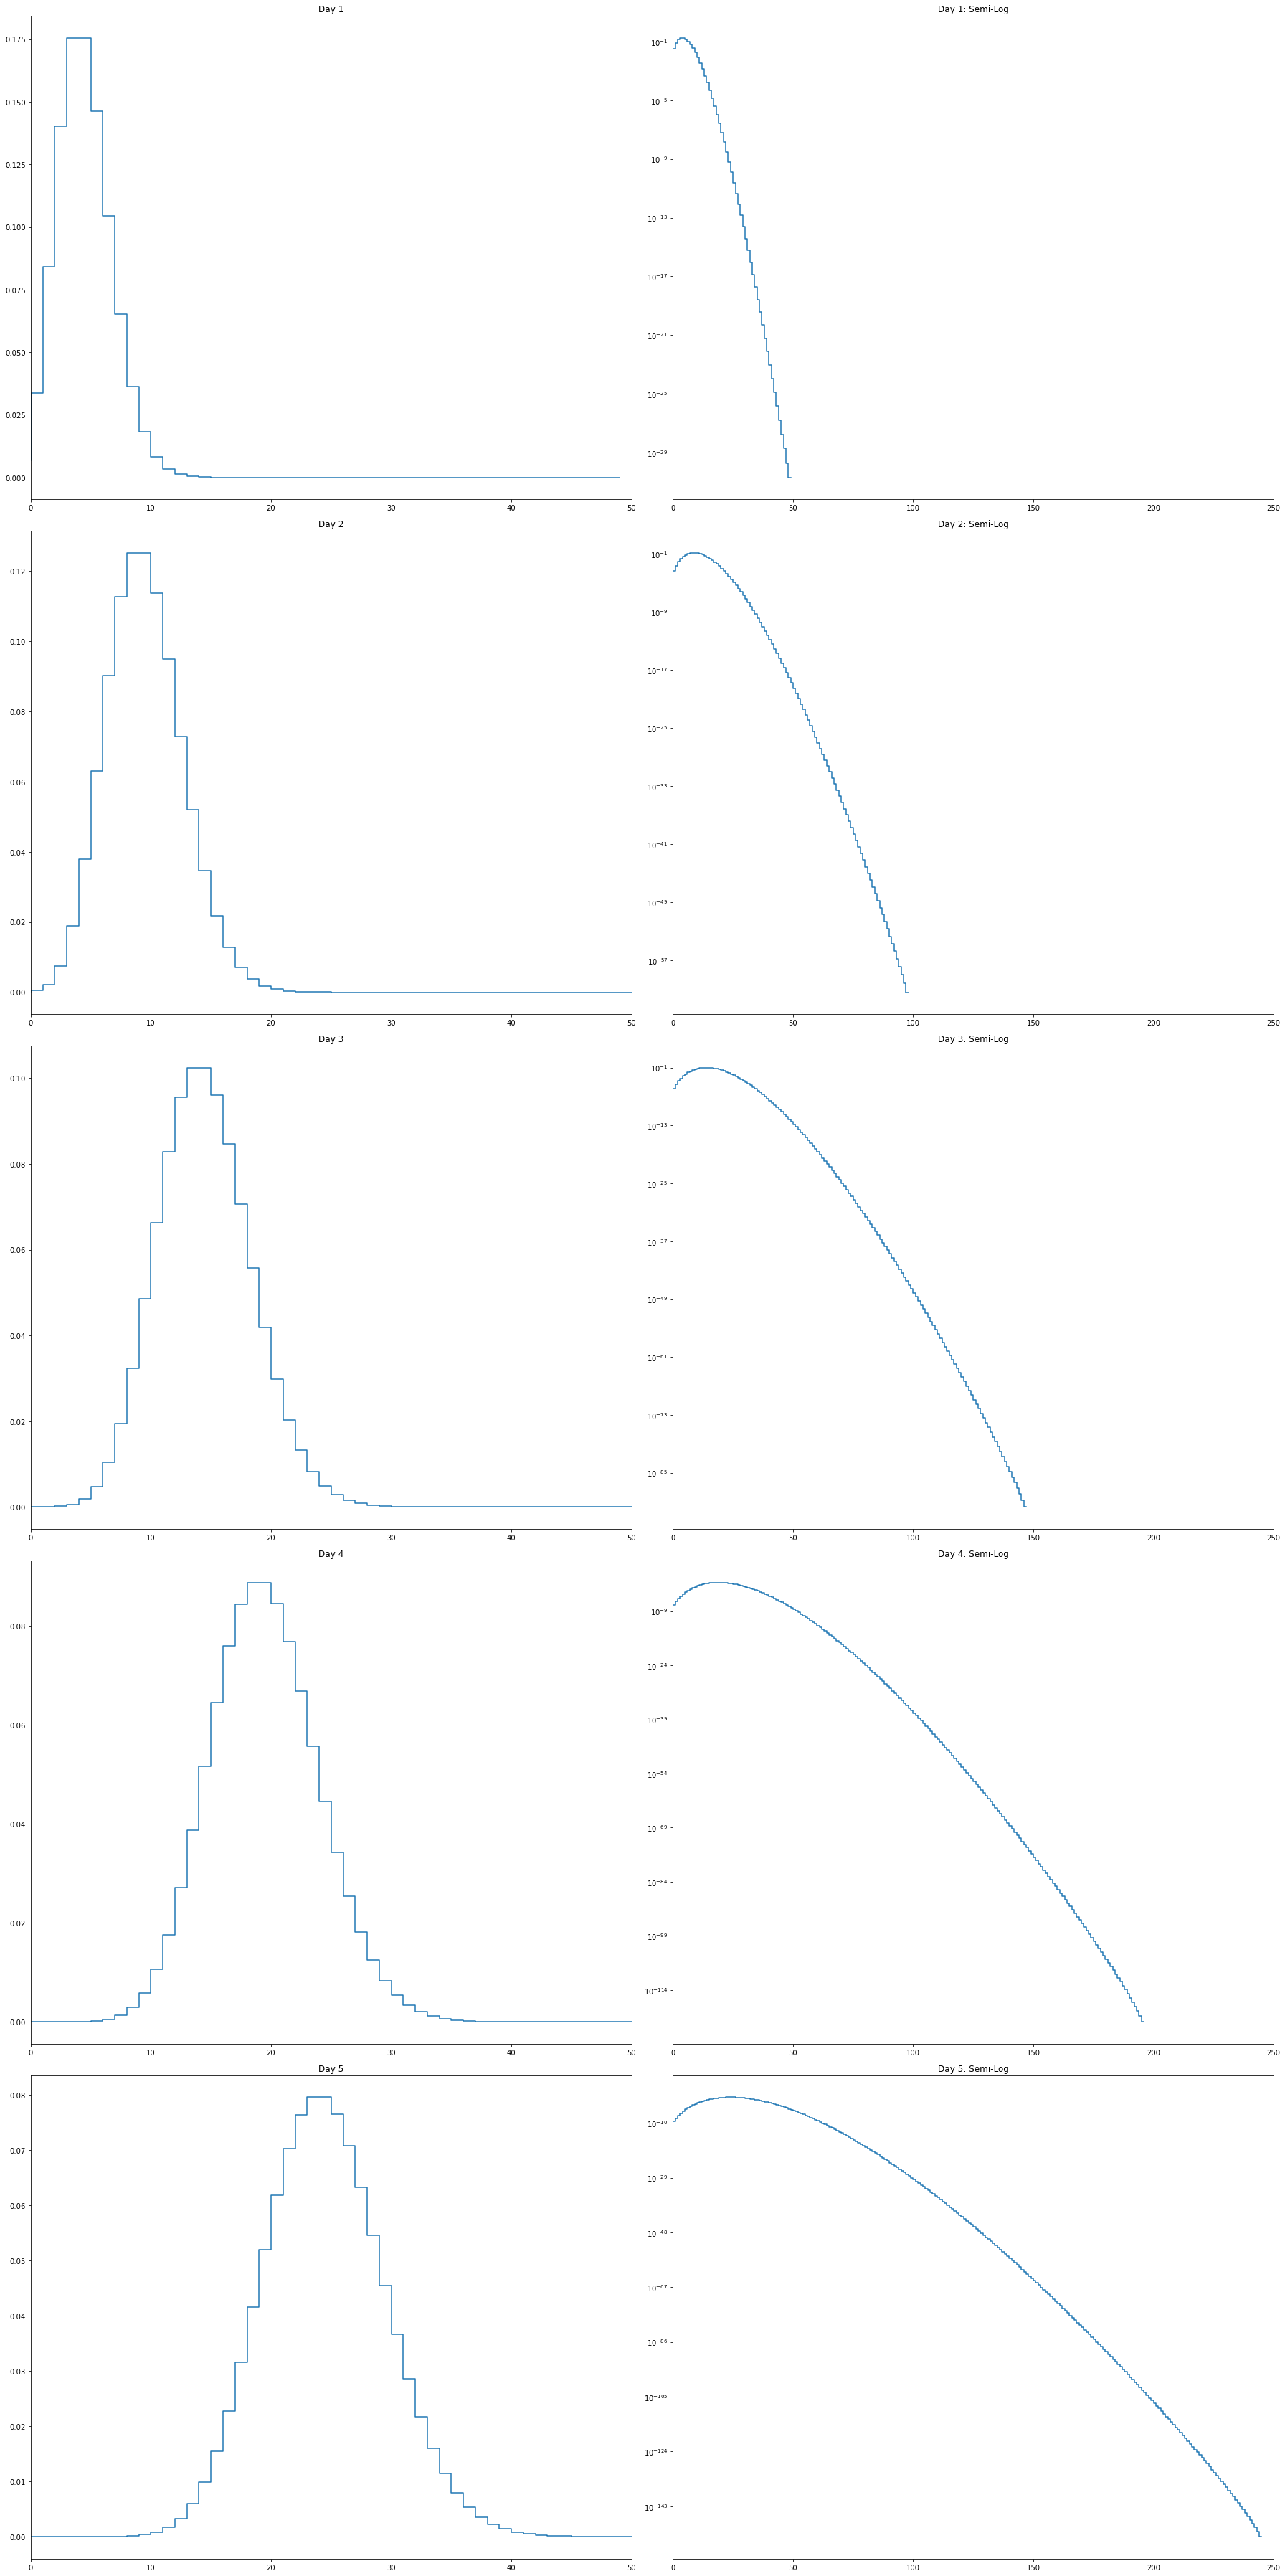

In [7]:
fig, ax = plt.subplots(5,2, figsize = (25,50))

ax[0,0].step(x, Day1)
ax[0,0].set_title('Day 1')
ax[0,0].set_xlim(0,50)

ax[0,1].set_yscale('log')
ax[0,1].set_title('Day 1: Semi-Log')
ax[0,1].step(x, Day1)
ax[0,1].set_xlim(0,250)

ax[1,0].step(np.arange(0,len(Day2)), Day2)
ax[1,0].set_title('Day 2')
ax[1,0].set_xlim(0,50)

ax[1,1].set_yscale('log')
ax[1,1].set_title('Day 2: Semi-Log')
ax[1,1].step(np.arange(0,len(Day2)), Day2)
ax[1,1].set_xlim(0,250)

ax[2,0].step(np.arange(0,len(Day3)), Day3)
ax[2,0].set_title('Day 3')
ax[2,0].set_xlim(0,50)

ax[2,1].set_yscale('log')
ax[2,1].set_title('Day 3: Semi-Log')
ax[2,1].step(np.arange(0,len(Day3)), Day3)
ax[2,1].set_xlim(0,250)

ax[3,0].step(np.arange(0,len(Day4)), Day4)
ax[3,0].set_title('Day 4')
ax[3,0].set_xlim(0,50)

ax[3,1].set_yscale('log')
ax[3,1].set_title('Day 4: Semi-Log')
ax[3,1].step(np.arange(0,len(Day4)), Day4)
ax[3,1].set_xlim(0,250)

ax[4,0].step(np.arange(0,len(Day5)), Day5)
ax[4,0].set_title('Day 5')
ax[4,0].set_xlim(0,50)

ax[4,1].set_yscale('log')
ax[4,1].set_title('Day 5: Semi-Log')
ax[4,1].step(np.arange(0,len(Day5)), Day5)
ax[4,1].set_xlim(0,250)

plt.tight_layout()
;

From the plots above, we can see as we sum for more days, the mean value of each plot shifts to the right. This is apparent from the first column. We can also see by examining the axes limits on column 2, that the variance of the distributions also increase and the plots become wider.

### B) 
Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.



In [8]:
x2 = np.arange(0,len(Day5), 1)

In [9]:
mean = np.sum(x2@Day5)

In [10]:
sample_poisson = stats.poisson.pmf(x2, mu = mean, loc = 0)

''

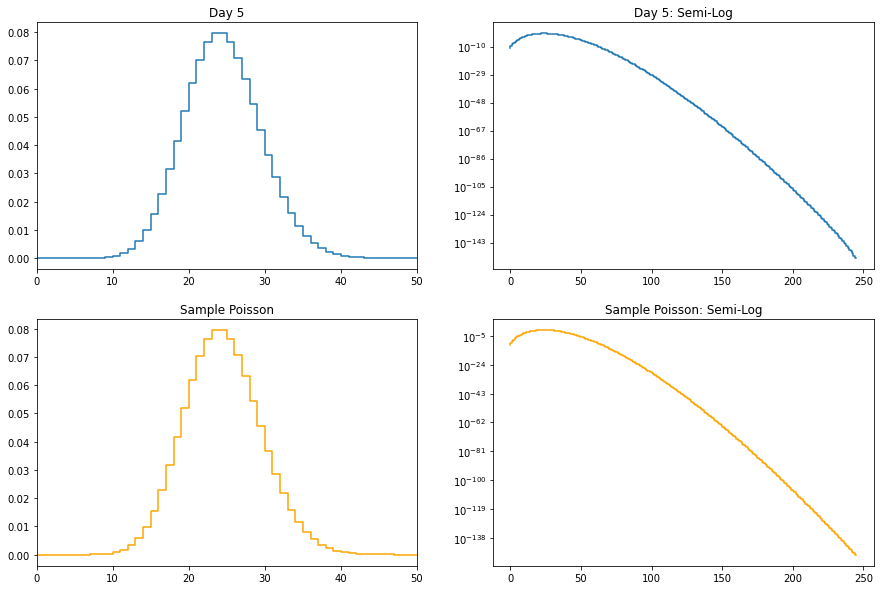

In [11]:
fig, ax = plt.subplots(2,2)
ax[0,0].step(x2, Day5)
ax[0,0].set_title('Day 5')
ax[0,0].set_xlim(0,50)

ax[0,1].set_yscale('log')
ax[0,1].set_title('Day 5: Semi-Log')
ax[0,1].step(x2, Day5)

ax[1,0].step(x2, sample_poisson, color = 'orange')
ax[1,0].set_title('Sample Poisson')
ax[1,0].set_xlim(0,50)

ax[1,1].set_yscale('log')
ax[1,1].set_title('Sample Poisson: Semi-Log')
ax[1,1].step(x2, sample_poisson, color = 'orange')
;

As you can see from the above plot, while the shape of the left graph is becoming more Gaussian in shape, the asymmetric semi-log plot is indicitave of a Poisson distributon. We can also see that a poisson distribution with the mean of the distribution of day 5 is identitcal to the resultant summed distribution. This fact makes sense as the number of summations in this case is only 5. If we were to sum to infinity, the resultant distribution would be Gaussian. However, since we are only summing 5 times, and the fact that the distribution is discrete, we should see a Poisson distribution.

### C) 
Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

In [12]:
Day10 = Day1
for i in range(9):
    Day10 = np.convolve(Day10, Day1)
    
Day20 = Day1
for i in range(19):
    Day20 = np.convolve(Day20, Day1)
    
Day40 = Day1
for i in range(39):
    Day40 = np.convolve(Day40, Day1)
    
Day100 = Day1
for i in range(99):
    Day100 = np.convolve(Day100, Day1)

In [13]:
x1_avg = x/1
x2_avg = np.arange(0,len(Day10), 1)/10
x3_avg = np.arange(0,len(Day20), 1)/20
x4_avg = np.arange(0,len(Day40), 1)/40
x5_avg = np.arange(0,len(Day100), 1)/100

(0.0, 25.0)

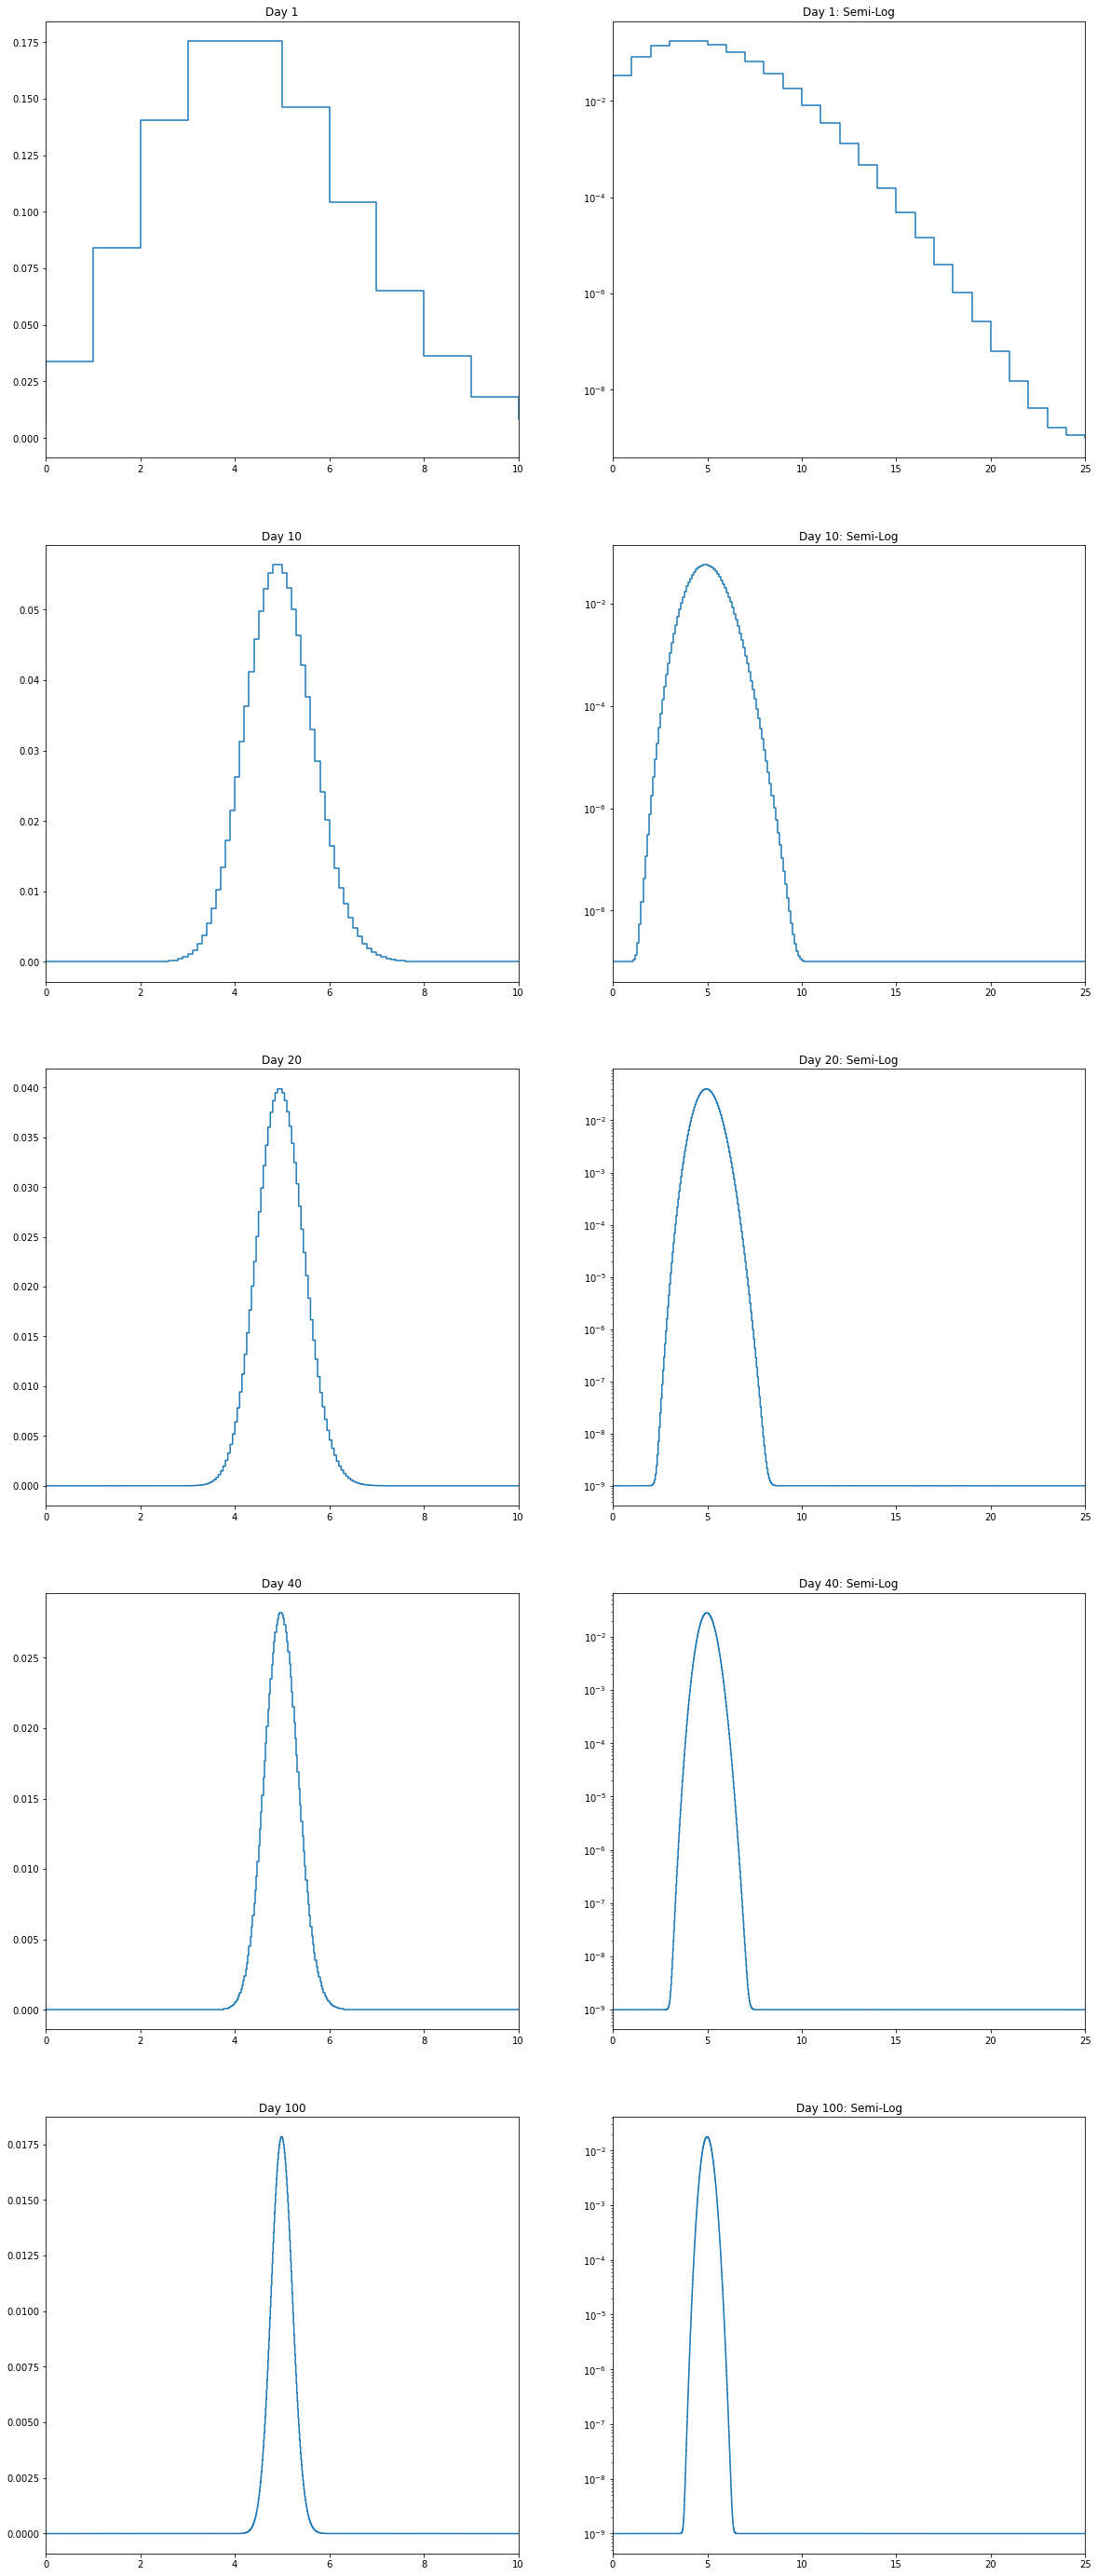

In [14]:
fig, ax = plt.subplots(5,2, figsize = (20,50))

ax[0,0].step(x1_avg, Day1)
ax[0,0].set_title('Day 1')
ax[0,0].set_xlim(0,10)

ax[0,1].set_yscale('log')
ax[0,1].set_title('Day 1: Semi-Log')
ax[0,1].step(x1_avg, Day1 + 0.000000001)
ax[0,1].set_xlim(0,25)

ax[1,0].step(x2_avg, Day10)
ax[1,0].set_title('Day 10')
ax[1,0].set_xlim(0,10)

ax[1,1].set_yscale('log')
ax[1,1].set_title('Day 10: Semi-Log')
ax[1,1].step(x2_avg, Day10 + 0.000000001)
ax[1,1].set_xlim(0,25)

ax[2,0].step(x3_avg, Day20)
ax[2,0].set_title('Day 20')
ax[2,0].set_xlim(0,10)

ax[2,1].set_yscale('log')
ax[2,1].set_title('Day 20: Semi-Log')
ax[2,1].step(x3_avg, Day20 + 0.000000001)
ax[2,1].set_xlim(0,25)

ax[3,0].step(x4_avg, Day40)
ax[3,0].set_title('Day 40')
ax[3,0].set_xlim(0,10)

ax[3,1].set_yscale('log')
ax[3,1].set_title('Day 40: Semi-Log')
ax[3,1].step(x4_avg, Day40 + 0.000000001)
ax[3,1].set_xlim(0,25)

ax[4,0].step(x5_avg, Day100)
ax[4,0].set_title('Day 100')
ax[4,0].set_xlim(0,10)

ax[4,1].set_yscale('log')
ax[4,1].set_title('Day 100: Semi-Log')
ax[4,1].step(x5_avg, Day100 + 0.000000001)
ax[4,1].set_xlim(0,25)

By averaging over more days, we can see that the width of the plots decreases. However, it appears that the width is decreasing with a relationship of approximately the inverse of the number of days, so even averaging for a huge number of days, we will never bring completely eliminate the background. In addition, the shape of the graph does appear to be approaching a Gaussian, consistent with the central limit theorem. However, I cannot plot the semi log plot of these to see "how" Gaussian they actually look after about day 9 as the minimum values of the convultion approach zero very quickly and are truncated to zero. For example, the minimum value on day 10 is on the order of $10^{-300}$.

### D) 
Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

In [162]:
N_days = 18
Gamma_rays = N_days * Y

In [163]:
Day18 = Day1
for i in range(N_days - 1):
    Day18 = np.convolve(Day18, Day1)

In [164]:
x_18 = (np.arange(0,len(Day18),1)/N_days)

In [184]:
mean = np.sum(x_18@Day18)

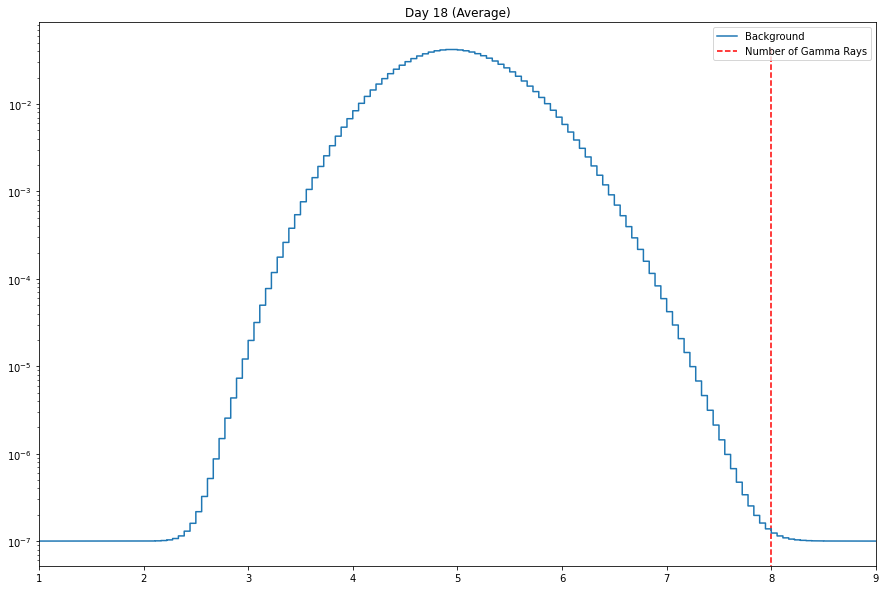

In [19]:
plt.step(x_18, Day18+0.0000001, label = 'Background')
plt.vlines(Gamma_rays/N_days, 0, 0.045, linestyle = '--', label = 'Number of Gamma Rays', color = 'red')
plt.xlim(1,9)
plt.yscale('log')
plt.title('Day 18 (Average)')
plt.legend()

I am going to assume that we should use the number of gamma rays per day here and approximate to a Gaussian distribution.

In [183]:
std

5.263611812036939e-14

In [182]:
scipy.stats.norm.sf(8, loc = mean, scale = std)

0.0

### Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.


In [20]:
x_r = np.arange(0,50,0.5)
rayleigh = stats.rayleigh.pdf(x_r, scale = 4)

(0.0, 40.0)

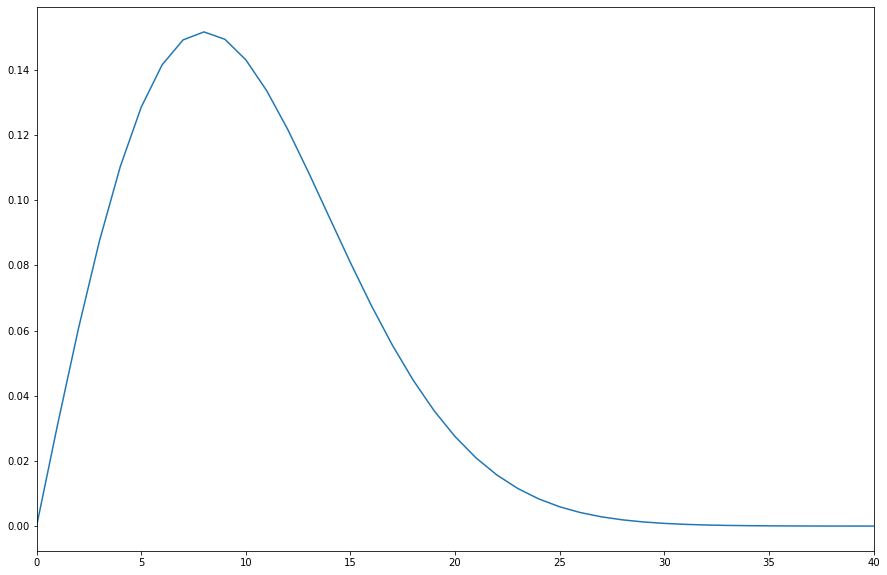

In [21]:
plt.plot(rayleigh)
plt.xlim(0,40)

#### A)
Show how the distribution changes as you average over more observing intervals.

In [22]:
Day1r = rayleigh

Day10r = Day1r
for i in range(9):
    Day10r = np.convolve(Day10r, Day1r)
    
Day50r = Day1r
for i in range(49):
    Day50r = np.convolve(Day50r, Day1r)
    
Day100r = Day1r
for i in range(99):
    Day100r = np.convolve(Day100r, Day1r)
    
Day200r = Day1r
for i in range(199):
    Day200r = np.convolve(Day200r, Day1r)

''

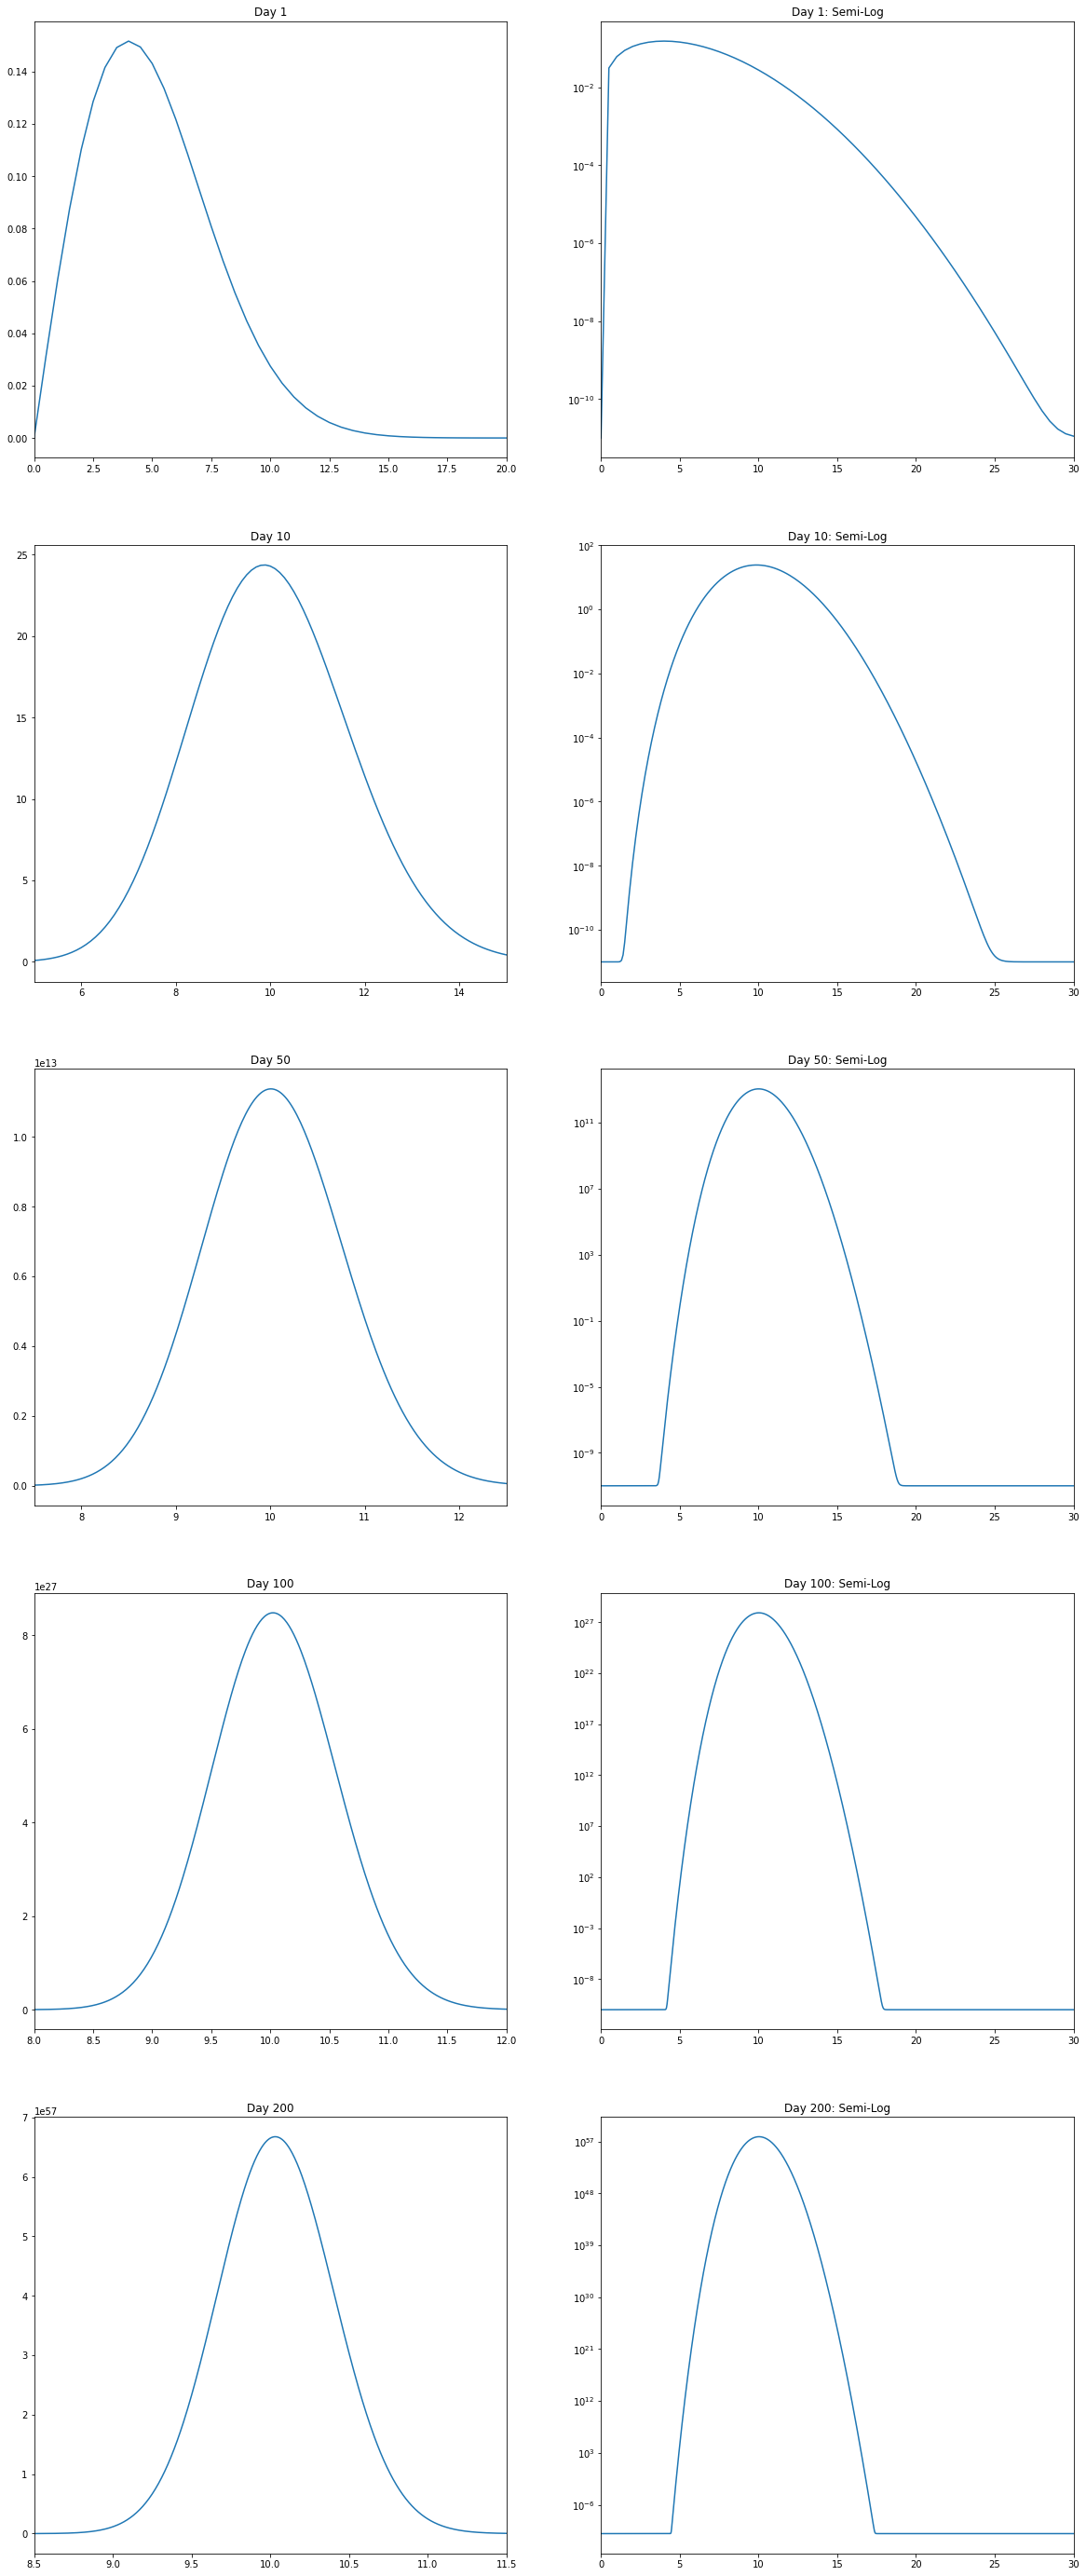

In [23]:
fig, ax = plt.subplots(5,2, figsize = (20,50))

ax[0,0].plot(x_r, Day1r)
ax[0,0].set_title('Day 1')
ax[0,0].set_xlim(0,20)

ax[0,1].set_yscale('log')
ax[0,1].set_title('Day 1: Semi-Log')
ax[0,1].plot(x_r, Day1r + 0.00000000001)
ax[0,1].set_xlim(0,30)

ax[1,0].plot(np.arange(0,len(Day10r))/10, Day10r)
ax[1,0].set_title('Day 10')
ax[1,0].set_xlim(5,15)

ax[1,1].set_yscale('log')
ax[1,1].set_title('Day 10: Semi-Log')
ax[1,1].plot(np.arange(0,len(Day10r))/10, Day10r + 0.00000000001)
ax[1,1].set_xlim(0,30)

ax[2,0].plot(np.arange(0,len(Day50r))/50, Day50r)
ax[2,0].set_title('Day 50')
ax[2,0].set_xlim(7.5,12.5)

ax[2,1].set_yscale('log')
ax[2,1].set_title('Day 50: Semi-Log')
ax[2,1].plot(np.arange(0,len(Day50r))/50, Day50r + 0.00000000001)
ax[2,1].set_xlim(0,30)

ax[3,0].plot(np.arange(0,len(Day100r))/100, Day100r)
ax[3,0].set_title('Day 100')
ax[3,0].set_xlim(8,12)

ax[3,1].set_yscale('log')
ax[3,1].set_title('Day 100: Semi-Log')
ax[3,1].plot(np.arange(0,len(Day100r))/100, Day100r + 0.00000000001)
ax[3,1].set_xlim(0,30)

ax[4,0].plot(np.arange(0,len(Day200r))/200, Day200r)
ax[4,0].set_title('Day 200')
ax[4,0].set_xlim(8.5,11.5)

ax[4,1].set_yscale('log')
ax[4,1].set_title('Day 200: Semi-Log')
ax[4,1].plot(np.arange(0,len(Day200r))/200, Day200r + 0.00000000001)
ax[4,1].set_xlim(0,30)

#plt.tight_layout()
;

#### B) 
Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

Again, Python is a jerk and won't let me plot the semi log axis. But, it appears that the average of the Rayleigh distribution starts to approach Gaussian after just 10 days! Although, one could argue that it is just lopsided. But by day 50 it is practically indistinguishable.

### Problem 3
The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years, and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

#### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

##### A) 
From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?



In [146]:
mean = 0
standard_deviation = 1

x_values = np.arange(-5, 5, 0.1)
bkg = scipy.stats.norm(loc = mean, scale = standard_deviation)
bkg_pdf = bkg.pdf(x_values)/10 # for some reason I need to normalize this? It integrates to 10.

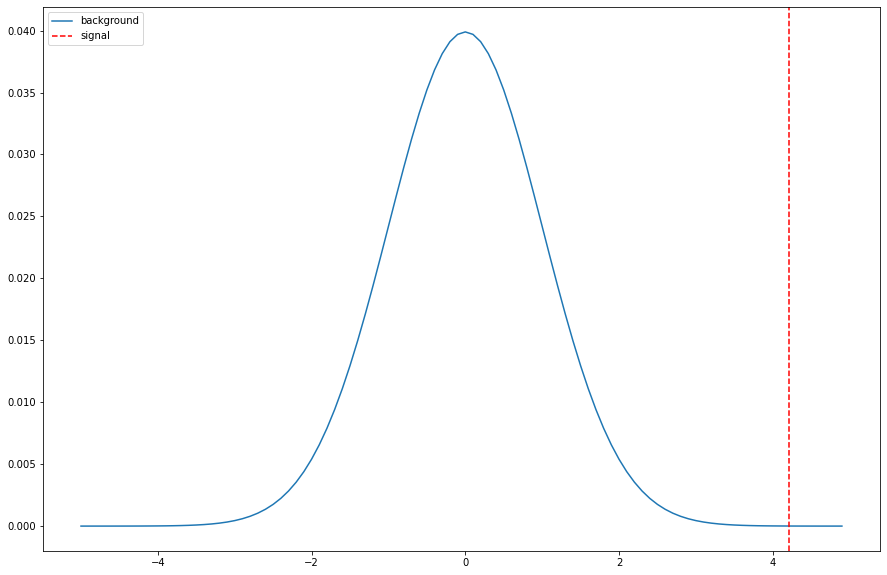

In [147]:
plt.plot(x_values, bkg_pdf ,label = 'background')
plt.axvline(Y, linestyle = '--', color = 'red', label = 'signal')
plt.legend()

In [27]:
probability = stats.norm.sf(Y, 0, 1)

In [28]:
print(f'This is a {-stats.norm.ppf(probability)}\u03C3 measurement. It does not meat the criteria for a 5\u03C3 result.')

This is a 4.21σ measurement. It does not meat the criteria for a 5σ result.


#### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.


#### B) 
If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

Statistical question: Given 10k pixels, what is the probability of the background producing a value as bright or brigter than the signal given in Version 1?

In [129]:
new_bkg = bkg_pdf*10000 #boosting by # of pixels

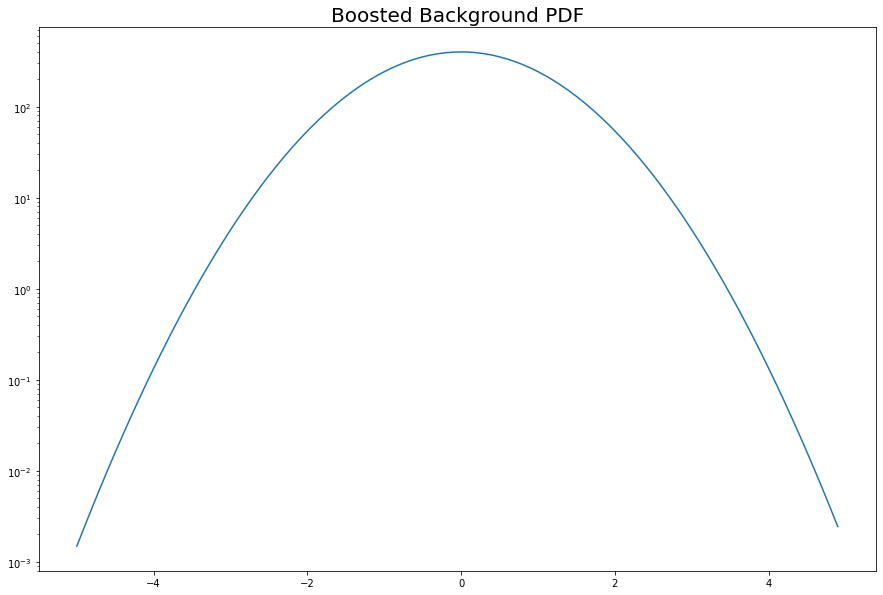

In [130]:
plt.plot(x_values, new_bkg,label = 'background')
plt.yscale('log')
plt.title('Boosted Background PDF', size = 20);

#### C) 
Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.